## Bài 3

### 3.1 Thu thập dữ liệu

#### 3.1.1a Cào dữ liệu từ trang web trên, lưu kết quả vào 1 file tương ứng (kq.txt) 

In [1]:
import requests
from bs4 import BeautifulSoup

#  link gốc
url = f"https://quotes.toscrape.com"
# Lưu trữ nội dung HTML 
html_contents = []

while len(html_contents) < 10:
    response = requests.get(url)
    doc = BeautifulSoup(response.text, "html.parser")
    html_contents.append(doc.prettify())  # Lưu nội dung HTML vào danh sách

    # Kiểm tra xem có nút "Next" hay không
    next_button = doc.find(class_="next")
    if next_button is not None:
        # Nếu có, lấy đường dẫn tới trang tiếp theo
        page_text = next_button.a
        next_url = f"https://quotes.toscrape.com{page_text['href']}"

        # Cập nhật url để truy cập vào trang tiếp theo
        url = next_url
    else:
        break
        
# Lưu dữ liệu vào file kq.txt với mã hóa utf-8
with open("kq.txt", "w", encoding="utf-8") as f:
    for i, html_content in enumerate(html_contents):
        f.write(f"Nội dung HTML của link {i+1}:\n")
        f.write(html_content)
        f.write("---------------------\n")
    print("Dữ liệu đã được lưu vào file kq.txt")

Dữ liệu đã được lưu vào file kq.txt


#### 3.1.1b Mô tả cấu trúc của trang web 

In [2]:
print(html_contents[0])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Quotes to Scrape
  </title>
  <link href="/static/bootstrap.min.css" rel="stylesheet"/>
  <link href="/static/main.css" rel="stylesheet"/>
 </head>
 <body>
  <div class="container">
   <div class="row header-box">
    <div class="col-md-8">
     <h1>
      <a href="/" style="text-decoration: none">
       Quotes to Scrape
      </a>
     </h1>
    </div>
    <div class="col-md-4">
     <p>
      <a href="/login">
       Login
      </a>
     </p>
    </div>
   </div>
   <div class="row">
    <div class="col-md-8">
     <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
      <span class="text" itemprop="text">
       “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
      </span>
      <span>
       by
       <small class="author" itemprop="author">
        Albert Einstein
       </small>
       <a href="/author/Albert

#### 3.1.2a Đọc tất cả các thẻ html (div) với lớp là "quote" và lưu nó trong biến 'result’, hiển thị giá trị biến 'result’ ra màn hình

In [3]:
# Tạo đối tượng BeautifulSoup từ nội dung HTML của các trang đã lưu
for html_content in html_contents:
    soup = BeautifulSoup(html_content, "html.parser")

    # Tìm tất cả các thẻ div có class là "quote"
    result = soup.find_all("div", class_="quote")

    # Hiển thị giá trị của biến 'result' ra màn hình
    print(result)

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">
       “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
      </span>
<span>
       by
       <small class="author" itemprop="author">
        Albert Einstein
       </small>
<a href="/author/Albert-Einstein">
        (about)
       </a>
</span>
<div class="tags">
       Tags:
       <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">
        change
       </a>
<a class="tag" href="/tag/deep-thoughts/page/1/">
        deep-thoughts
       </a>
<a class="tag" href="/tag/thinking/page/1/">
        thinking
       </a>
<a class="tag" href="/tag/world/page/1/">
        world
       </a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">
       “It is our choic

#### 3.1.2b Tìm trong biến 'result’ vừa rồi các dữ liệu có chứa nhãn "small" với class là "author" và in kết quả ra màn hình

In [4]:
# Tìm tất cả các thẻ có nhãn "small" và lớp là "author" trong biến 'result'
authors = [str(quote.find("small", class_="author")) for html_content in html_contents for quote in BeautifulSoup(html_content, "html.parser").find_all("div", class_="quote") if quote.find("small", class_="author")]

# In ra danh sách các tên tác giả theo định dạng yêu cầu
print(", ".join(authors))

<small class="author" itemprop="author">
        Albert Einstein
       </small>, <small class="author" itemprop="author">
        J.K. Rowling
       </small>, <small class="author" itemprop="author">
        Albert Einstein
       </small>, <small class="author" itemprop="author">
        Jane Austen
       </small>, <small class="author" itemprop="author">
        Marilyn Monroe
       </small>, <small class="author" itemprop="author">
        Albert Einstein
       </small>, <small class="author" itemprop="author">
        André Gide
       </small>, <small class="author" itemprop="author">
        Thomas A. Edison
       </small>, <small class="author" itemprop="author">
        Eleanor Roosevelt
       </small>, <small class="author" itemprop="author">
        Steve Martin
       </small>, <small class="author" itemprop="author">
        Marilyn Monroe
       </small>, <small class="author" itemprop="author">
        J.K. Rowling
       </small>, <small class="author" itemprop="a

#### 3.1.2c Viết hàm tacgiaLink() để lấy nội dung của mỗi tác giả.

In [5]:
import requests
from bs4 import BeautifulSoup
ngay_sinh_author_2 = []
def tacgiaLink():
#     ngay_sinh_author_1 = []
    authors_info = []  # Tạo danh sách để lưu thông tin của các tác giả
    page = 1
    while True:
        # Tạo đường link của trang web
        link = f"https://quotes.toscrape.com/page/{page}/"
        response = requests.get(link)
        doc = BeautifulSoup(response.content, "html.parser")

        # Kiểm tra nếu không còn trích xuất dữ liệu được nữa thì thoát vòng lặp
        if not doc.find("div", class_="quote"):
            break

        # Lặp qua các thẻ div có lớp là "quote" trong trang web
        for div in doc.find_all("div", class_="quote"):
            ten_tac_gia = div.find("small", class_="author").get_text().replace("\n", "").strip()
            link_tac_gia = div.find("a")["href"]
            link_tg = f"https://quotes.toscrape.com{link_tac_gia}"
            response_tac_gia = requests.get(link_tg)
            doc_tac_gia = BeautifulSoup(response_tac_gia.content, "html.parser")
            ngay_sinh = doc_tac_gia.find(class_="author-born-date").get_text()
#             ngay_sinh_author_1+=ngay_sinh
            cau_noi_noi_tieng = div.find(class_="text").get_text().replace("\n", "").strip()

            # Lưu thông tin của tác giả vào danh sách authors_info
            author_info = {
                "Tên tác giả": ten_tac_gia,
                "Đường link của tác giả": link_tg,
                "Ngày tháng năm sinh": ngay_sinh,
                "Câu nói nổi tiếng của tác giả": cau_noi_noi_tieng
            }
            authors_info.append(author_info)

        # Tăng số trang lên 1 để tiếp tục trích xuất dữ liệu từ trang tiếp theo
        page += 1

    return authors_info

#### 3.1.2d  Lưu kết quả ở câu c vào file Quote.csv tương ứng, với mỗi tác giả là 1dòng dữ liệu. <br>Thu thập ít nhất 40 câu nói nổi tiếng từ trangweb trên một cách tự động theo code của các ý trên.

In [6]:
import csv
authors_info = tacgiaLink()

# Ghi thông tin của tác giả vào file CSV
with open('Quote.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=authors_info[0].keys())
    writer.writeheader()
    writer.writerows(authors_info)

print("Đã ghi thông tin của tác giả vào file CSV.")

# Đọc thông tin từ file CSV và hiển thị lên màn hình
with open('Quote.csv', 'r', newline='', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        print(row)

Đã ghi thông tin của tác giả vào file CSV.
{'Tên tác giả': 'Albert Einstein', 'Đường link của tác giả': 'https://quotes.toscrape.com/author/Albert-Einstein', 'Ngày tháng năm sinh': 'March 14, 1879', 'Câu nói nổi tiếng của tác giả': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'}
{'Tên tác giả': 'J.K. Rowling', 'Đường link của tác giả': 'https://quotes.toscrape.com/author/J-K-Rowling', 'Ngày tháng năm sinh': 'July 31, 1965', 'Câu nói nổi tiếng của tác giả': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”'}
{'Tên tác giả': 'Albert Einstein', 'Đường link của tác giả': 'https://quotes.toscrape.com/author/Albert-Einstein', 'Ngày tháng năm sinh': 'March 14, 1879', 'Câu nói nổi tiếng của tác giả': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”'}
{'Tên tác giả': 'Jane Austen', 'Đường link của tác giả'

### 3.2. Khai phá dữ liệu

#### 3.2.1. Xử lý dữ liệu- Data Imputation

#### - Bạn hãy thêm vào Trường STT và điền tự động dữ liệu của trường này?

In [7]:
import pandas as pd
df_data = pd.read_csv('Quote.csv')
# df_data

In [8]:
# sử dụng lệnh dưới khi bạn đã chạy 1 lần rồi
# df_data = df_data.drop('STT', axis=1)
# df_data.insert(loc = 0, column = 'STT', value=list(range(1, 101)))
# df_data.head(10)

In [9]:
#thêm vào Trường STT và điền tự động dữ liệu của trường này
df_data['STT'] = list(range(1, 101))
df_data = df_data[['STT', 'Tên tác giả', 'Đường link của tác giả', 'Ngày tháng năm sinh', 'Câu nói nổi tiếng của tác giả']]
df_data[:10]

,STT,Tên tác giả,Đường link của tác giả,Ngày tháng năm sinh,Câu nói nổi tiếng của tác giả
0,1,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"March 14, 1879",“The world as we have created it is a process ...
1,2,J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965","“It is our choices, Harry, that show what we t..."
2,3,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"March 14, 1879",“There are only two ways to live your life. On...
3,4,Jane Austen,https://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775","“The person, be it gentleman or lady, who has ..."
4,5,Marilyn Monroe,https://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926","“Imperfection is beauty, madness is genius and..."
5,6,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"March 14, 1879",“Try not to become a man of success. Rather be...
6,7,André Gide,https://quotes.toscrape.com/author/Andre-Gide,"November 22, 1869",“It is better to be hated for what you are tha...
7,8,Thomas A. Edison,https://quotes.toscrape.com/author/Thomas-A-Ed...,"February 11, 1847","“I have not failed. I've just found 10,000 way..."
8,9,Eleanor Roosevelt,https://quotes.toscrape.com/author/Eleanor-Roo...,"October 11, 1884",“A woman is like a tea bag; you never know how...
9,10,Steve Martin,https://quotes.toscrape.com/author/Steve-Martin,"August 14, 1945","“A day without sunshine is like, you know, nig..."


#### - Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền?

In [10]:
# hoặc có thể dùng hàm dưới để kiểm tra xem có thiếu dữ liệu nào không, nếu trả về False là không bị thiếu 
# nếu trả về True là có giá trị bị thiếu
df_data['Ngày tháng năm sinh'].isnull().values.any()

False

#### Kết quả trả về False nên Trường Ngày sinh của bảng dữ liệu không bị thiếu

## - Bạn hãy thêm vào Trường Tuoi (Tuổi) và đề xuất cách điền tuổi của các tác giả? 

#### Vì trường ngày sinh đã đầy đủ không thiếu bất kì thông tin nào nên ta tiếp tục tìm tuổi của các tác giả

#### Vì trong trang web cào không có dữ liệu về ngày mất của của các tác giả nên em sử dụng tra cứu trên Internet về tuổi của người đã mất và tính tuổi của người còn sống theo năm hiện tại bằng cách "lấy năm hiện tại - năm sinh của tác giả"

In [11]:
# lấy dữ liệu cột ngày tháng năm sinh
author_born = df_data['Ngày tháng năm sinh']
# chuyển dữ liệu vừa lấy thành 1 list để dễ xử lí
list_born = author_born.tolist()
# print(list_born)

In [12]:
# dữ liệu em tìm được trên internet, có những tác giả đã mất nên có số tuổi xác định
# còn những tác giả còn sống đến hiện nay chưa xác đinh được tuổi chính xác nên cần xác định là 'age'
list_age = [76, 'age', 76, 41, 36, 76, 82, 84, 78, 'age',
            36, 'age', 76, 36, 87, 49, 87, 56, 74, 86,
            69, 78, 87, 'age', 54, 87, 76, 'age', 76, 36,
            87, 'age', 36, 87, 'age', 78, 'age', 76, 87, 61,
            'age', 64, 36, 36, 76, 36, 36, 39, 'age', 63,
            41, 78, 36, 76, 'age', 71, 'age', 62, 88, 54,
            74, 'age', 'age', 64, 81, 'age', 62, 78, 75, 87,
            83, 74, 67, 87, 91, 71, 40, 66, 77, 75,
            76, 41, 'age', 41, 41, 64, 64, 75, 75, 64,
            'age', 28, 77, 68, 'age', 90, 89, 75, 87, 'age']
# len(list_age)
list_find_age = []
# tìm vị trí tuổi của tác giả còn sống
for i in range(len(list_age)):
    if list_age[i] == 'age':
        list_find_age.append(i)
list_find_age

[1, 9, 11, 23, 27, 31, 34, 36, 40, 48, 54, 56, 61, 62, 65, 82, 90, 94, 99]

In [13]:
# lấy năm của ngày sinh tác giả
# em sẽ dùng thư viện datetime
from datetime import datetime
# tạo 1 list chứa các năm sinh của các tác giả cần tìm
borns_format_year = []
for i in range(len(list_born)):
    born_format = datetime.strptime(list_born[i], '%B %d, %Y')
    year = born_format.year
    borns_format_year.append(year)
# kiểm tra year thuộc kiểu dữ liệu nào
print(type(year))

<class 'int'>


In [14]:
# lấy năm của thời điểm hiện tại
import time
x = time.localtime()
print(x[0])
# kiểm tra x[0] thuộc kiểu dữ liệu nào
print(type(x[0]))

2023
<class 'int'>


In [15]:
# vậy x[0] và year thuộc cùng kiểu dữ liệu int nên em tiếp tục tìm tuổi của tác giả còn sống

# tìm tuổi của tất cả tác giả còn sống
age_list_author = []
for i in range(len(borns_format_year)):
    age = x[0] - borns_format_year[i]
    age_list_author.append(age)
age_list_author
# lấy tuổi của các tác giả còn sống
age_found_all = []
for i in list_find_age:
    age_found = age_list_author[i]
    age_found_all.append(age_found)
age_found_all

[58, 78, 58, 81, 58, 58, 58, 75, 75, 58, 74, 50, 61, 61, 58, 58, 58, 58, 75]

In [16]:
# thống nhất, gộp lại tuổi đã tìm được
list_find_age
age_found_all
k = 0
for i in list_find_age:
    if list_age[i]:
        list_age[i] = age_found_all[k]
        k+=1
        if k >99:
            break
# print(list_age)
new_list_age = list_age.copy()
print(new_list_age)

[76, 58, 76, 41, 36, 76, 82, 84, 78, 78, 36, 58, 76, 36, 87, 49, 87, 56, 74, 86, 69, 78, 87, 81, 54, 87, 76, 58, 76, 36, 87, 58, 36, 87, 58, 78, 75, 76, 87, 61, 75, 64, 36, 36, 76, 36, 36, 39, 58, 63, 41, 78, 36, 76, 74, 71, 50, 62, 88, 54, 74, 61, 61, 64, 81, 58, 62, 78, 75, 87, 83, 74, 67, 87, 91, 71, 40, 66, 77, 75, 76, 41, 58, 41, 41, 64, 64, 75, 75, 64, 58, 28, 77, 68, 58, 90, 89, 75, 87, 75]


In [17]:
# thêm cột tuổi
df_data['Tuổi'] = new_list_age
df_data = df_data[['STT', 'Tên tác giả', 'Đường link của tác giả',
                   'Ngày tháng năm sinh', 'Câu nói nổi tiếng của tác giả', 'Tuổi']]
df_data.head(10)

,STT,Tên tác giả,Đường link của tác giả,Ngày tháng năm sinh,Câu nói nổi tiếng của tác giả,Tuổi
0,1,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"March 14, 1879",“The world as we have created it is a process ...,76
1,2,J.K. Rowling,https://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965","“It is our choices, Harry, that show what we t...",58
2,3,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"March 14, 1879",“There are only two ways to live your life. On...,76
3,4,Jane Austen,https://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775","“The person, be it gentleman or lady, who has ...",41
4,5,Marilyn Monroe,https://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926","“Imperfection is beauty, madness is genius and...",36
5,6,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"March 14, 1879",“Try not to become a man of success. Rather be...,76
6,7,André Gide,https://quotes.toscrape.com/author/Andre-Gide,"November 22, 1869",“It is better to be hated for what you are tha...,82
7,8,Thomas A. Edison,https://quotes.toscrape.com/author/Thomas-A-Ed...,"February 11, 1847","“I have not failed. I've just found 10,000 way...",84
8,9,Eleanor Roosevelt,https://quotes.toscrape.com/author/Eleanor-Roo...,"October 11, 1884",“A woman is like a tea bag; you never know how...,78
9,10,Steve Martin,https://quotes.toscrape.com/author/Steve-Martin,"August 14, 1945","“A day without sunshine is like, you know, nig...",78


## 3.2.2. Khám phá dữ liệu- Data Exploration

### Lấy số dòng với số cột có trong bộ dữ liệu

In [18]:
# Lấy số dòng với số cột có trong bộ dữ liệu
a = df_data.shape
print(a) #khi xuất a output: (100, 6) có thể hiểu bảng dữ liệu có 100 dòng và 6 cột
print(f"Bảng dữ liệu có {a[0]} dòng dữ liệu và {a[1]} cột dữ liệu")

(100, 6)
Bảng dữ liệu có 100 dòng dữ liệu và 6 cột dữ liệu


### Xem thông tin về Index, kiểu dữ liệu và dung lượng của dữ liệu

In [19]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   STT                            100 non-null    int64 
 1   Tên tác giả                    100 non-null    object
 2   Đường link của tác giả         100 non-null    object
 3   Ngày tháng năm sinh            100 non-null    object
 4   Câu nói nổi tiếng của tác giả  100 non-null    object
 5   Tuổi                           100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


### Tổng kết thông tin thống kê cho các cột có kiểu dữ liệu là số

In [20]:
df_data.describe()

,STT,Tuổi
count,100.000000,100.000000
mean,50.500000,66.200000
std,29.011492,16.846305
min,1.000000,28.000000
25%,25.750000,58.000000
50%,50.500000,72.500000
75%,75.250000,78.000000
max,100.000000,91.000000


## - Thống kê về tác giả và câu nói nổi tiếng có trong bộ dữ liệu

In [21]:
# lấy dữ liệu cột tên tác giả
author_name = df_data['Tên tác giả']
# chuyển dữ liệu vừa lấy thành 1 list để dễ xử lí
list_name = author_name.tolist()
# print(list_name)

In [22]:
# lấy dữ liệu tên và câu quote nổi tiếng trong bảng và chuyển thành list
list_name = df_data['Tên tác giả'].tolist()
list_quote = df_data['Câu nói nổi tiếng của tác giả'].tolist()

#### ++ Thống kê số lượng tác giả và in ra

In [23]:
# kiểm tra có bao nhiêu tác giả trong danh sách
from collections import Counter
list_name
author_counts = Counter(list_name)
# author_counts
print(f"Có {len(author_counts)} tác giả trong bộ dữ liệu:")
new_author = dict(author_counts)
# liệt kê tác giả
# count = 0
for x in new_author:
    print(f"\t{x}")


Có 50 tác giả trong bộ dữ liệu:
	Albert Einstein
	J.K. Rowling
	Jane Austen
	Marilyn Monroe
	André Gide
	Thomas A. Edison
	Eleanor Roosevelt
	Steve Martin
	Bob Marley
	Dr. Seuss
	Douglas Adams
	Elie Wiesel
	Friedrich Nietzsche
	Mark Twain
	Allen Saunders
	Pablo Neruda
	Ralph Waldo Emerson
	Mother Teresa
	Garrison Keillor
	Jim Henson
	Charles M. Schulz
	William Nicholson
	Jorge Luis Borges
	George Eliot
	George R.R. Martin
	C.S. Lewis
	Martin Luther King Jr.
	James Baldwin
	Haruki Murakami
	Alexandre Dumas fils
	Stephenie Meyer
	Ernest Hemingway
	Helen Keller
	George Bernard Shaw
	Charles Bukowski
	Suzanne Collins
	J.R.R. Tolkien
	Alfred Tennyson
	Terry Pratchett
	J.D. Salinger
	George Carlin
	John Lennon
	W.C. Fields
	Ayn Rand
	Jimi Hendrix
	J.M. Barrie
	E.E. Cummings
	Khaled Hosseini
	Harper Lee
	Madeleine L'Engle


##### ++ Các tác giả và câu quote tương ứng của họ trong bộ dữ liệu

In [24]:
# các tác giả và câu quote tương ứng của họ
k = 0
for i in range(len(list_name)):
    # print(f"{i+1}.\033[94m {list_name[i]} \033[0m : \033[91m{list_quote[k]} \033[0m ")
    print(f"{i+1}. {list_name[i]}:  {list_quote[k]} ")
    k+=1

1. Albert Einstein:  “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.” 
2. J.K. Rowling:  “It is our choices, Harry, that show what we truly are, far more than our abilities.” 
3. Albert Einstein:  “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.” 
4. Jane Austen:  “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.” 
5. Marilyn Monroe:  “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.” 
6. Albert Einstein:  “Try not to become a man of success. Rather become a man of value.” 
7. André Gide:  “It is better to be hated for what you are than to be loved for what you are not.” 
8. Thomas A. Edison:  “I have not failed. I've just found 10,000 ways that won't work.” 
9. Eleanor Roosevelt:  “A woman is like a tea bag; you never know ho

##### ++ Thống kê số lượng câu nói nổi tiếng của mỗi tác giả trong bộ dữ liệu

In [25]:
# chuyển Counter thành 1 dict có tên là new_dict
new_dict = dict(author_counts)
# liệt kê tác giả có bao nhiêu câu nói nổi tiếng trong bộ dữ liệu
for x in new_dict:
    # print(f"\033[94m {x} \033[0m có \033[91m {new_dict.get(x)} \033[0m câu nói nổi tiếng trong bộ dữ liệu")
    print(f"{x} có {new_dict.get(x)} câu nói nổi tiếng trong bộ dữ liệu")

Albert Einstein có 10 câu nói nổi tiếng trong bộ dữ liệu
J.K. Rowling có 9 câu nói nổi tiếng trong bộ dữ liệu
Jane Austen có 5 câu nói nổi tiếng trong bộ dữ liệu
Marilyn Monroe có 7 câu nói nổi tiếng trong bộ dữ liệu
André Gide có 1 câu nói nổi tiếng trong bộ dữ liệu
Thomas A. Edison có 1 câu nói nổi tiếng trong bộ dữ liệu
Eleanor Roosevelt có 2 câu nói nổi tiếng trong bộ dữ liệu
Steve Martin có 1 câu nói nổi tiếng trong bộ dữ liệu
Bob Marley có 3 câu nói nổi tiếng trong bộ dữ liệu
Dr. Seuss có 6 câu nói nổi tiếng trong bộ dữ liệu
Douglas Adams có 1 câu nói nổi tiếng trong bộ dữ liệu
Elie Wiesel có 1 câu nói nổi tiếng trong bộ dữ liệu
Friedrich Nietzsche có 1 câu nói nổi tiếng trong bộ dữ liệu
Mark Twain có 6 câu nói nổi tiếng trong bộ dữ liệu
Allen Saunders có 1 câu nói nổi tiếng trong bộ dữ liệu
Pablo Neruda có 1 câu nói nổi tiếng trong bộ dữ liệu
Ralph Waldo Emerson có 2 câu nói nổi tiếng trong bộ dữ liệu
Mother Teresa có 2 câu nói nổi tiếng trong bộ dữ liệu
Garrison Keillor có 1 câ

##### - Thống kê về năm sinh và độ tuổi của các tác giả

##### + Thống kê về năm sinh

In [26]:
list_name
# chuyển thành dict
age_level = dict(zip(list_name, borns_format_year))
age_level
# list_tuoi

{'Albert Einstein': 1879,
 'J.K. Rowling': 1965,
 'Jane Austen': 1775,
 'Marilyn Monroe': 1926,
 'André Gide': 1869,
 'Thomas A. Edison': 1847,
 'Eleanor Roosevelt': 1884,
 'Steve Martin': 1945,
 'Bob Marley': 1945,
 'Dr. Seuss': 1904,
 'Douglas Adams': 1952,
 'Elie Wiesel': 1928,
 'Friedrich Nietzsche': 1844,
 'Mark Twain': 1835,
 'Allen Saunders': 1899,
 'Pablo Neruda': 1904,
 'Ralph Waldo Emerson': 1803,
 'Mother Teresa': 1910,
 'Garrison Keillor': 1942,
 'Jim Henson': 1936,
 'Charles M. Schulz': 1922,
 'William Nicholson': 1948,
 'Jorge Luis Borges': 1899,
 'George Eliot': 1819,
 'George R.R. Martin': 1948,
 'C.S. Lewis': 1898,
 'Martin Luther King Jr.': 1929,
 'James Baldwin': 1924,
 'Haruki Murakami': 1949,
 'Alexandre Dumas fils': 1824,
 'Stephenie Meyer': 1973,
 'Ernest Hemingway': 1899,
 'Helen Keller': 1880,
 'George Bernard Shaw': 1856,
 'Charles Bukowski': 1920,
 'Suzanne Collins': 1962,
 'J.R.R. Tolkien': 1892,
 'Alfred Tennyson': 1809,
 'Terry Pratchett': 1948,
 'J.D. Sal

In [27]:
list_name
# lấy dữ liệu cột ngày tháng năm sinh
list_tuoi = df_data['Tuổi'].tolist()
# chuyển thành dict
age_level = dict(zip(list_name, list_tuoi))
age_level
# list_tuoi

{'Albert Einstein': 76,
 'J.K. Rowling': 58,
 'Jane Austen': 41,
 'Marilyn Monroe': 36,
 'André Gide': 82,
 'Thomas A. Edison': 84,
 'Eleanor Roosevelt': 78,
 'Steve Martin': 78,
 'Bob Marley': 36,
 'Dr. Seuss': 87,
 'Douglas Adams': 49,
 'Elie Wiesel': 87,
 'Friedrich Nietzsche': 56,
 'Mark Twain': 75,
 'Allen Saunders': 86,
 'Pablo Neruda': 69,
 'Ralph Waldo Emerson': 78,
 'Mother Teresa': 87,
 'Garrison Keillor': 81,
 'Jim Henson': 54,
 'Charles M. Schulz': 78,
 'William Nicholson': 75,
 'Jorge Luis Borges': 87,
 'George Eliot': 61,
 'George R.R. Martin': 75,
 'C.S. Lewis': 64,
 'Martin Luther King Jr.': 39,
 'James Baldwin': 63,
 'Haruki Murakami': 74,
 'Alexandre Dumas fils': 71,
 'Stephenie Meyer': 50,
 'Ernest Hemingway': 62,
 'Helen Keller': 88,
 'George Bernard Shaw': 54,
 'Charles Bukowski': 74,
 'Suzanne Collins': 61,
 'J.R.R. Tolkien': 81,
 'Alfred Tennyson': 83,
 'Terry Pratchett': 67,
 'J.D. Salinger': 91,
 'George Carlin': 71,
 'John Lennon': 40,
 'W.C. Fields': 66,
 'Ay

In [28]:
# for x in age_level:
#     print(age_level.get(x), end= '\n')

### + Độ tuổi của các tác giả

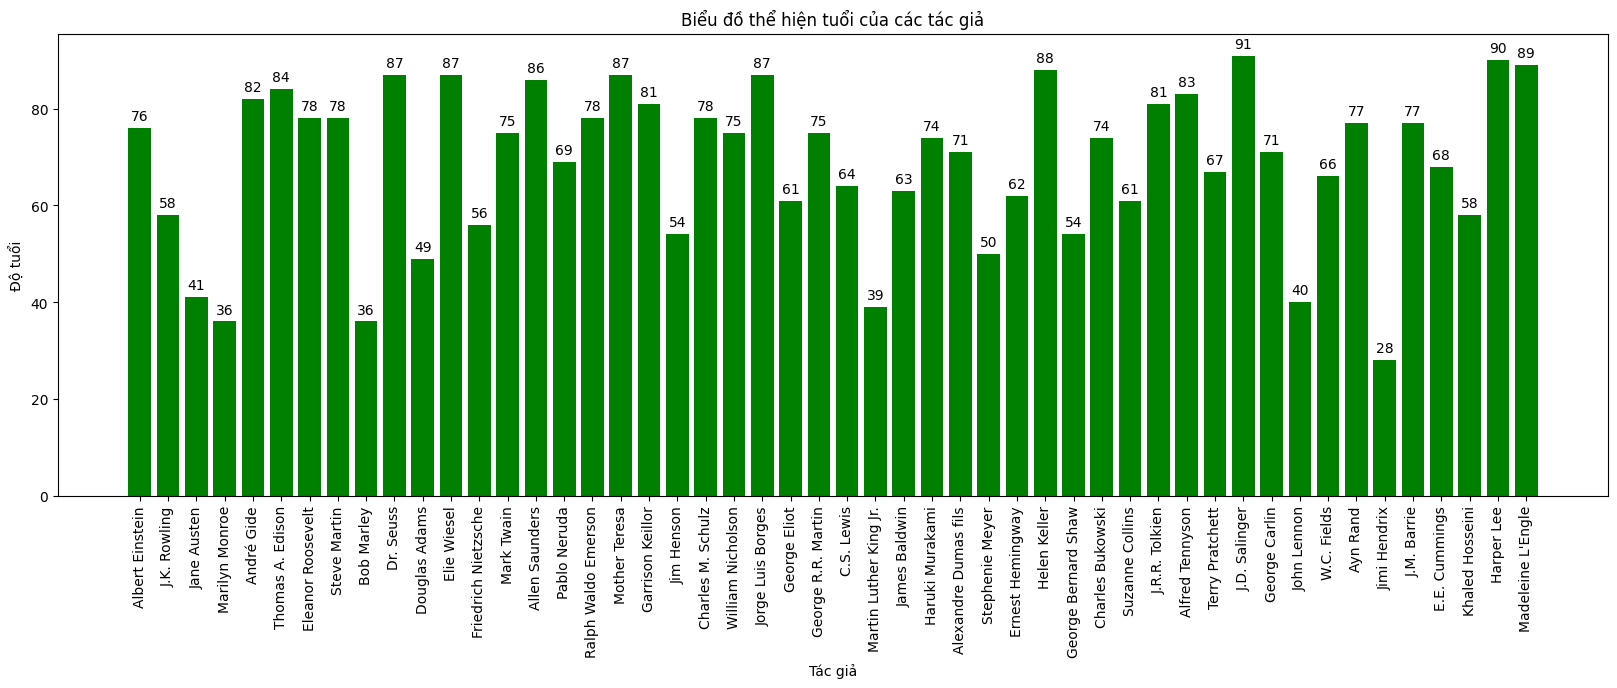

In [29]:
import matplotlib.pyplot as plt

# Tạo list các tác giả và tuổi tương ứng
authors = list(age_level.keys())
ages = list(age_level.values())

# Vẽ biểu đồ
plt.figure(figsize=(20,6))
plt.bar(authors, ages, color='green')
plt.title('Biểu đồ thể hiện tuổi của các tác giả')
plt.xlabel('Tác giả')
plt.ylabel('Độ tuổi')
# Thêm chỉ số tuổi trên đầu thanh bar
for i, age in enumerate(ages):
    plt.text(i, age+1, str(age), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

In [30]:
max_age = max(ages)
def loc(ages):
    for i in range(len(ages)):
        if ages[i] == max_age:
            return i
a= loc(ages)
print(f'Tác giả lớn tuổi nhất là \033[94m{authors[a]}: {max_age} \033[0m')

Tác giả lớn tuổi nhất là J.D. Salinger: 91 


In [31]:
min_age = min(ages)
def loc(ages):
    for i in range(len(ages)):
        if ages[i] == min_age:
            return i
b= loc(ages)
print(f'Tác giả nhỏ tuổi nhất là \033[94m{authors[b]}: {min_age} \033[0m')

Tác giả nhỏ tuổi nhất là Jimi Hendrix: 28 


##### - Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, …

##### + Câu dài nhất

In [32]:
quote_length = []
for i in range(len(list_quote)):
    quote_length.append(len(list_quote[i]))
a = max(quote_length)
for i in range(len(list_quote)):
    if len(list_quote[i]) == max(quote_length):
        # print(list_quote_new[i])
        print(list_quote[i])
        break
        # print(len(list_quote_new[i]))

“This life is what you make it. No matter what, you're going to mess up sometimes, it's a universal truth. But the good part is you get to decide how you're going to mess it up. Girls will be your friends - they'll act like it anyway. But just remember, some come, some go. The ones that stay with you through everything - they're your true best friends. Don't let go of them. Also remember, sisters make the best friends in the world. As for lovers, well, they'll come and go too. And baby, I hate to say it, most of them - actually pretty much all of them are going to break your heart, but you can't give up because if you give up, you'll never find your soulmate. You'll never find that half who makes you whole and that goes for everything. Just because you fail once, doesn't mean you're gonna fail at everything. Keep trying, hold on, and always, always, always believe in yourself, because if you don't, then who will, sweetie? So keep your head high, keep your chin up, and most importantly,

#### + Câu ngắn nhất

In [33]:
quote_length
min_sen = min(quote_length)
for i in range(len(list_quote)):
    if len(list_quote[i]) == min_sen:
        print(list_quote[i])
        break

“We read to know we're not alone.”


#### + Chiều dài của các câu quote

#### *Độ dài của các câu quote

In [34]:
list_quote
lengh_quote = []
for quote in list_quote:
    lengh_quote.append(len(quote))
# so_tu_quote
dict_lengh_quote = dict(zip(list_quote, lengh_quote))
dict_lengh_quote

{'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”': 115,
 '“It is our choices, Harry, that show what we truly are, far more than our abilities.”': 85,
 '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”': 131,
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”': 104,
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”": 111,
 '“Try not to become a man of success. Rather become a man of value.”': 67,
 '“It is better to be hated for what you are than to be loved for what you are not.”': 82,
 "“I have not failed. I've just found 10,000 ways that won't work.”": 65,
 "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”": 85,
 '“A day without sunshine is like, you know, night.”': 50,
 "“This lif

#### *Số từ trong các câu quote

In [35]:
amount_word_quote = []
for quote in list_quote:
    amount_word_quote.append(len(quote.split()))
# so_tu_quote
amount_word_quote = dict(zip(list_quote, amount_word_quote))
amount_word_quote

{'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”': 21,
 '“It is our choices, Harry, that show what we truly are, far more than our abilities.”': 16,
 '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”': 26,
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”': 19,
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”": 16,
 '“Try not to become a man of success. Rather become a man of value.”': 14,
 '“It is better to be hated for what you are than to be loved for what you are not.”': 19,
 "“I have not failed. I've just found 10,000 ways that won't work.”": 12,
 "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”": 19,
 '“A day without sunshine is like, you know, night.”': 9,
 "“This life is 

#### Top 10 câu quote dài nhất

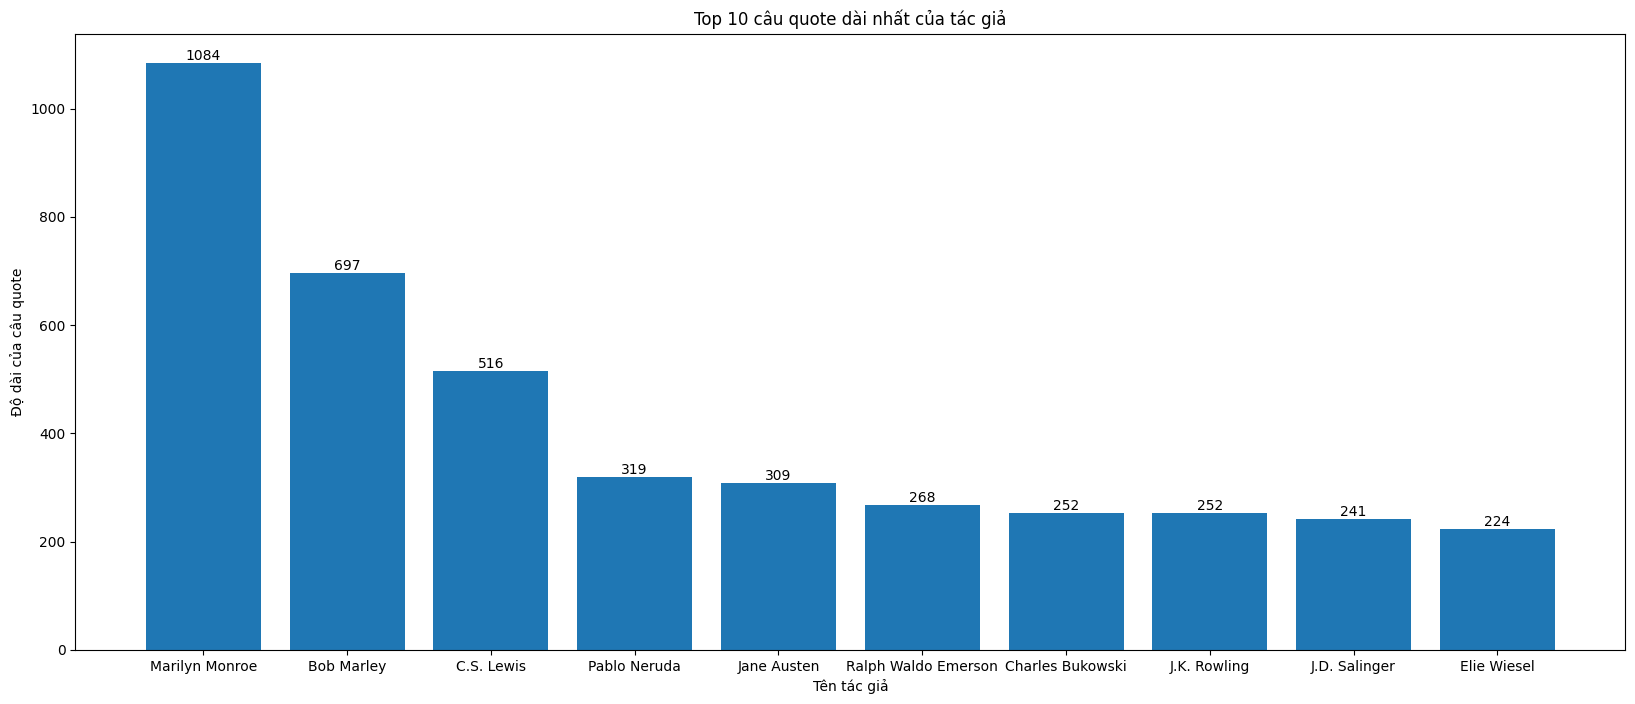

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Quote.csv')
# Tính độ dài của mỗi câu quote
df['QuoteLen'] = df['Câu nói nổi tiếng của tác giả'].apply(lambda x: len(x))
# Sắp xếp các câu quote theo thứ tự giảm dần độ dài
sorted_quotes = df.sort_values(by='QuoteLen', ascending=False)
# Lấy 10 câu quote đầu tiên
top_10 = sorted_quotes.head(10)
# Tạo figure object với figsize
fig, ax = plt.subplots(figsize=(20, 8))
# Vẽ biểu đồ Top 10 câu quote dài nhất
plt.bar(top_10['Tên tác giả'], top_10['QuoteLen'])
# hiển thị chỉ số độ dài của câu quote
for i, v in enumerate(top_10['QuoteLen']):
    plt.text(i, v, str(v), ha='center', va='bottom')
# Thêm tiêu đề cho biểu đồ
plt.title('Top 10 câu quote dài nhất của tác giả')
# Thêm tên cho trục x và trục y
plt.xlabel('Tên tác giả')
plt.ylabel('Độ dài của câu quote')
# Hiển thị biểu đồ
plt.show()

#### Top 10 câu quote ngắn nhất

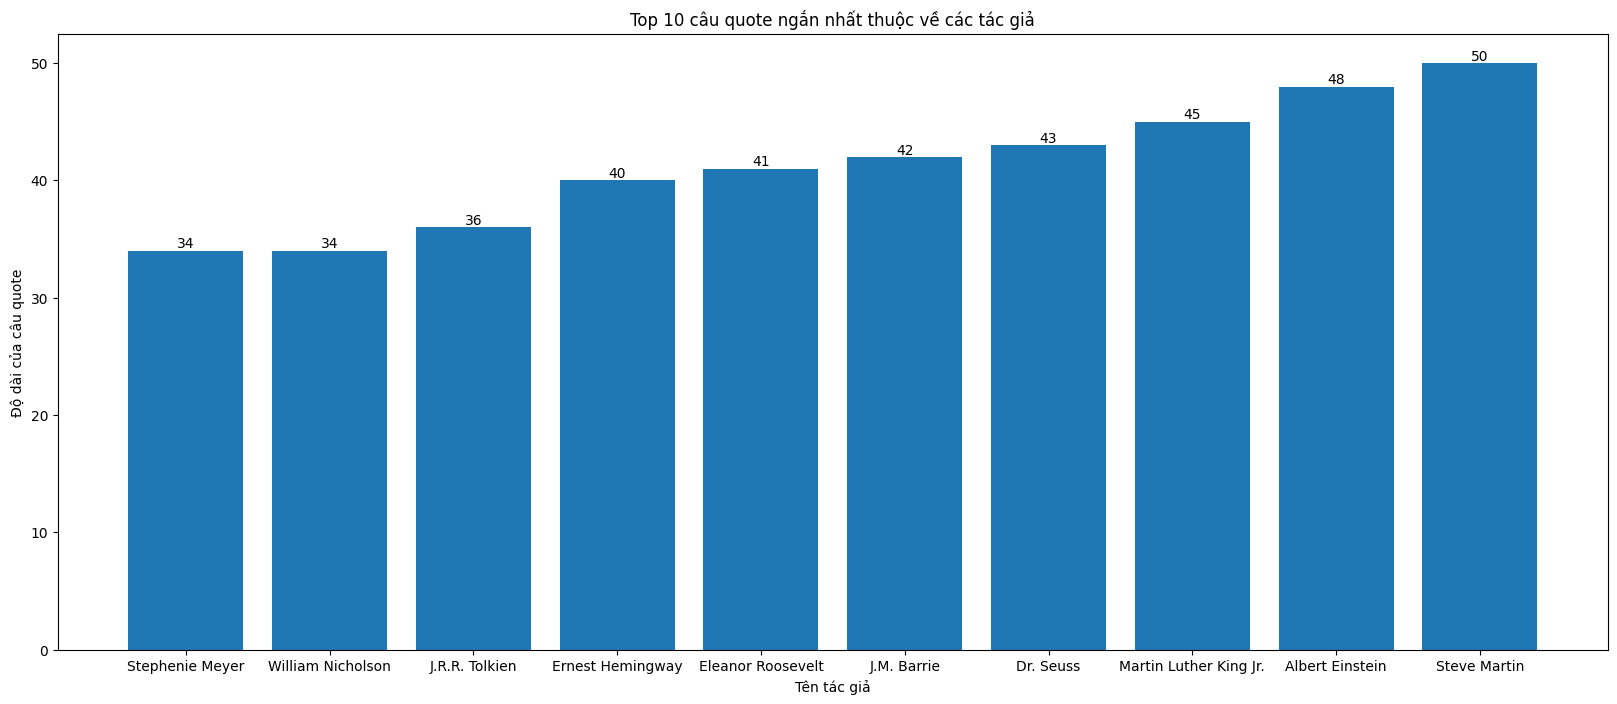

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
# Đọc dữ liệu từ file csv
df = pd.read_csv('Quote.csv')
# Tính độ dài của mỗi câu quote
df['QuoteLen'] = df['Câu nói nổi tiếng của tác giả'].apply(lambda x: len(x))
# Sắp xếp các câu quote theo thứ tự giảm dần độ dài
sorted_quotes = df.sort_values(by='QuoteLen', ascending=True)
# Lấy 10 câu quote đầu tiên
top_10 = sorted_quotes.head(10)
# Tạo figure object với figsize
fig, ax = plt.subplots(figsize=(20, 8))
# Vẽ biểu đồ Top 10 câu quote dài nhất
plt.bar(top_10['Tên tác giả'], top_10['QuoteLen'])
# hiển thị chỉ số độ dài của câu quote
for i, v in enumerate(top_10['QuoteLen']):
    plt.text(i, v, str(v), ha='center', va='bottom')
# Thêm tiêu đề cho biểu đồ
plt.title('Top 10 câu quote ngắn nhất thuộc về các tác giả')
# Thêm tên cho trục x và trục y
plt.xlabel('Tên tác giả')
plt.ylabel('Độ dài của câu quote')
# Hiển thị biểu đồ
plt.show()

 ### - Thống kê về các từ được sử dụng trong các câu nói

#### + Đếm số lượng từ xuất hiện trong các câu nói

In [38]:
import collections
list_quote
# Tạo danh sách rỗng để lưu các từ
word_list = []
# Duyệt qua các câu nói, tách các câu nói thành các từ và thêm các từ đó vào danh sách
for quote in list_quote:
    words = quote.split()
    word_list.extend(words)
# Sử dụng collections.Counter() để đếm số lượng các từ trong danh sách
word_counts = collections.Counter(word_list)
print(word_counts)

Counter({'you': 76, 'to': 69, 'is': 67, 'a': 60, 'the': 55, 'of': 48, 'and': 43, 'I': 39, 'not': 33, 'be': 29, 'that': 27, 'it': 26, 'in': 25, 'your': 18, 'who': 18, 'but': 18, 'have': 17, 'will': 17, 'can': 17, 'are': 15, 'what': 14, 'as': 13, 'with': 13, 'all': 13, 'my': 13, '“The': 12, 'or': 12, 'for': 12, 'never': 12, 'more': 11, '“I': 11, 'if': 11, 'love': 11, 'think': 11, 'no': 11, "it's": 10, 'make': 10, 'up': 10, 'than': 9, 'because': 9, 'her': 9, 'she': 9, 'from': 9, 'do': 9, 'one': 9, 'we': 8, '“It': 8, 'only': 8, 'The': 8, 'like': 8, 'so': 8, 'when': 8, 'live': 7, '“A': 7, 'going': 7, 'But': 7, 'at': 7, '“If': 7, '“You': 7, 'may': 7, 'our': 6, 'without': 6, 'has': 6, 'just': 6, 'them': 6, 'give': 6, 'keep': 6, "don't": 6, 'time': 6, 'see': 6, 'people': 6, 'an': 6, '“There': 5, 'good': 5, 'must': 5, 'man': 5, 'day': 5, 'get': 5, '-': 5, 'let': 5, "doesn't": 5, 'great': 5, 'every': 5, 'love,': 5, 'way': 5, 'by': 5, 'on': 5, 'lives': 5, 'book': 5, 'really': 5, 'am': 5, 'world':

#### + Từ được xuất hiện nhiều nhất

In [39]:
word_counts.most_common(1)

[('you', 76)]

#### + Top 10 các từ được sử dụng nhiều nhất

In [40]:
top_10_word = []
top_10_amount = []
top_words = word_counts.most_common(10)
# In ra 10 các từ được sử dụng nhiều nhất
print("Các từ được sử dụng nhiều nhất:")
for word, count in top_words:
    print(f'\t{word}: {count}')
    top_10_word.append(word)
    top_10_amount.append(count)

Các từ được sử dụng nhiều nhất:
	you: 76
	to: 69
	is: 67
	a: 60
	the: 55
	of: 48
	and: 43
	I: 39
	not: 33
	be: 29


#### - Phân tích, trực quan mối quan hệ giữa các tác giả và câu nói nổi tiếng

#### + Số lượng câu nói nổi tiếng của các tác giả

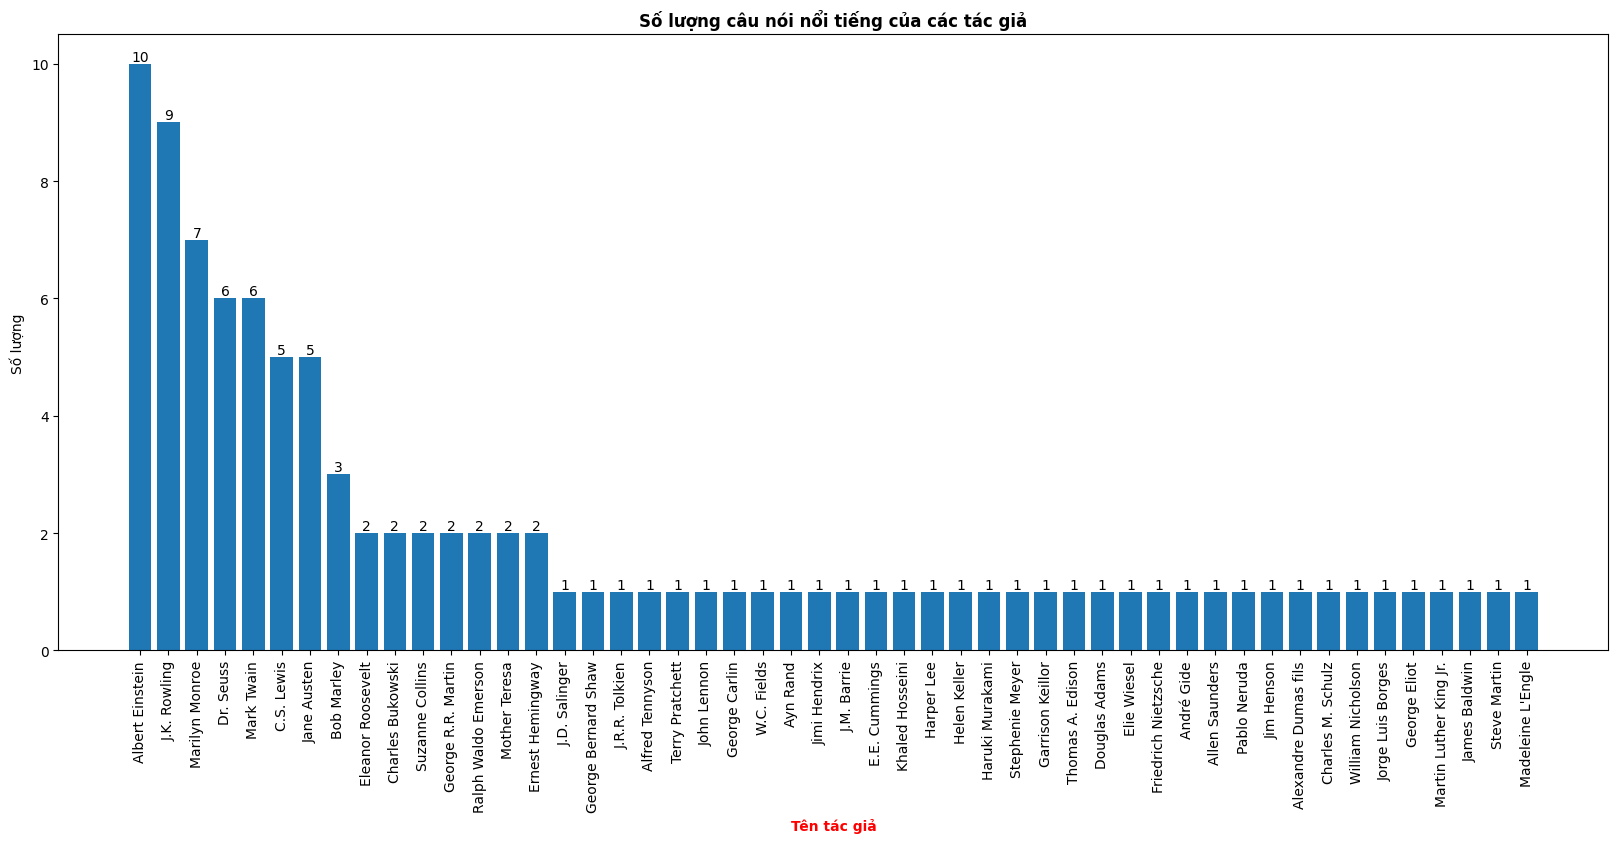

In [41]:
import pandas as pd
df = pd.read_csv('Quote.csv')
amount_quotes = df['Tên tác giả'].value_counts()
# plt.bar(freq_table.index, freq_table.values)
plt.figure(figsize=(20, 8))
plt.bar(amount_quotes.index, amount_quotes.values)
plt.xticks(rotation=90)
for i, amount_quote in enumerate(amount_quotes):
    plt.text(i, amount_quote, str(amount_quote), ha='center', va='bottom')
plt.title('Số lượng câu nói nổi tiếng của các tác giả', fontweight = 'bold')
plt.xlabel('Tên tác giả', fontweight = 'bold', color = 'red')
plt.ylabel('Số lượng')
plt.show()
amount_quote_author = amount_quotes.sort_values(ascending=True)

### + Đồ thị biểu diễn 10 từ được sử dụng nhiều nhất trong các câu quote của các tác giả (biểu thị sự ưa thích sử dụng từ trong các câu quote của các tác giả)

Text(0, 0.5, 'Số lượng')

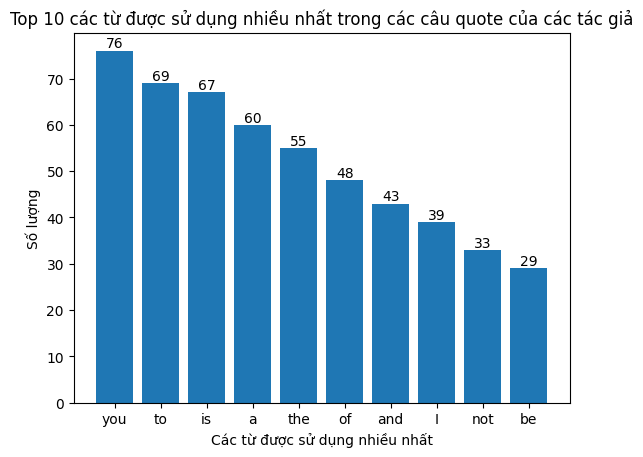

In [42]:
plt.bar(x = top_10_word, height = top_10_amount)
# Hiển thị chỉ số lượng các từ
for i, v in enumerate(top_10_amount):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.title('Top 10 các từ được sử dụng nhiều nhất trong các câu quote của các tác giả')
plt.xlabel('Các từ được sử dụng nhiều nhất')
plt.ylabel('Số lượng')

### - Phân tích, trực quan mối quan hệ giữa các tác giả với nhau

In [43]:
# Tạo một list copy lưu trữ độ tuổi của các tác giả
authors_age = age_level.copy()
# Tạo các biến đếm cho các khoảng độ tuổi
age_20s = []
age_30s = []
age_40s = []
age_50s = []
age_60s = []
age_70s = []
age_80s = []
age_90s = []
# Duyệt qua từng tác giả và kiểm tra độ tuổi của họ nằm trong khoảng nào
for author, age in authors_age.items():
    if age >= 20 and age < 30:
        age_20s.append(author)
    elif age >= 30 and age < 40:
        age_30s.append(author)
    elif age >= 40 and age < 50:
        age_40s.append(author)
    elif age >= 50 and age < 60:
        age_50s.append(author)
    elif age >= 60 and age < 70:
        age_60s.append(author)
    elif age >= 70 and age < 80:
        age_70s.append(author)
    elif age >= 80 and age < 90:
        age_80s.append(author)
    elif age >= 90 and age < 100:
        age_90s.append(author)
# In ra các tác giả theo khoảng độ tuổi
print('Các tác giả trong khoảng độ tuổi 20-29:')
for author in age_20s:
    print(f'\t\033[94m{author}\033[0m')
print('Các tác giả trong khoảng độ tuổi 30-39:')
for author in age_30s:
    print(f'\t\033[94m{author}\033[0m')
print('Các tác giả trong khoảng độ tuổi 40-49:')
for author in age_40s:
    print(f'\t\033[94m{author}\033[0m')
print('Các tác giả trong khoảng độ tuổi 50-59:')
for author in age_50s:
    print(f'\t\033[94m{author}\033[0m')
print('Các tác giả trong khoảng độ tuổi 60-69:')
for author in age_60s:
    print(f'\t\033[94m{author}\033[0m')
print('Các tác giả trong khoảng độ tuổi 70-79:')
for author in age_70s:
    print(f'\t\033[94m{author}\033[0m')
print('Các tác giả trong khoảng độ tuổi 80-89:')
for author in age_80s:
    print(f'\t\033[94m{author}\033[0m')
print('Các tác giả trong khoảng độ tuổi 90-99:')
for author in age_90s:
    print(f'\t\033[94m{author}\033[0m')

Các tác giả trong khoảng độ tuổi 20-29:
	Jimi Hendrix
Các tác giả trong khoảng độ tuổi 30-39:
	Marilyn Monroe
	Bob Marley
	Martin Luther King Jr.
Các tác giả trong khoảng độ tuổi 40-49:
	Jane Austen
	Douglas Adams
	John Lennon
Các tác giả trong khoảng độ tuổi 50-59:
	J.K. Rowling
	Friedrich Nietzsche
	Jim Henson
	Stephenie Meyer
	George Bernard Shaw
	Khaled Hosseini
Các tác giả trong khoảng độ tuổi 60-69:
	Pablo Neruda
	George Eliot
	C.S. Lewis
	James Baldwin
	Ernest Hemingway
	Suzanne Collins
	Terry Pratchett
	W.C. Fields
	E.E. Cummings
Các tác giả trong khoảng độ tuổi 70-79:
	Albert Einstein
	Eleanor Roosevelt
	Steve Martin
	Mark Twain
	Ralph Waldo Emerson
	Charles M. Schulz
	William Nicholson
	George R.R. Martin
	Haruki Murakami
	Alexandre Dumas fils
	Charles Bukowski
	George Carlin
	Ayn Rand
	J.M. Barrie
Các tác giả trong khoảng độ tuổi 80-89:
	André Gide
	Thomas A. Edison
	Dr. Seuss
	Elie Wiesel
	Allen Saunders
	Mother Teresa
	Garrison Keillor
	Jorge Luis Borges
	Helen Keller
	J.R

##### + Vẽ biểu đồ thể hiện số lượng tác giả theo độ tuổi

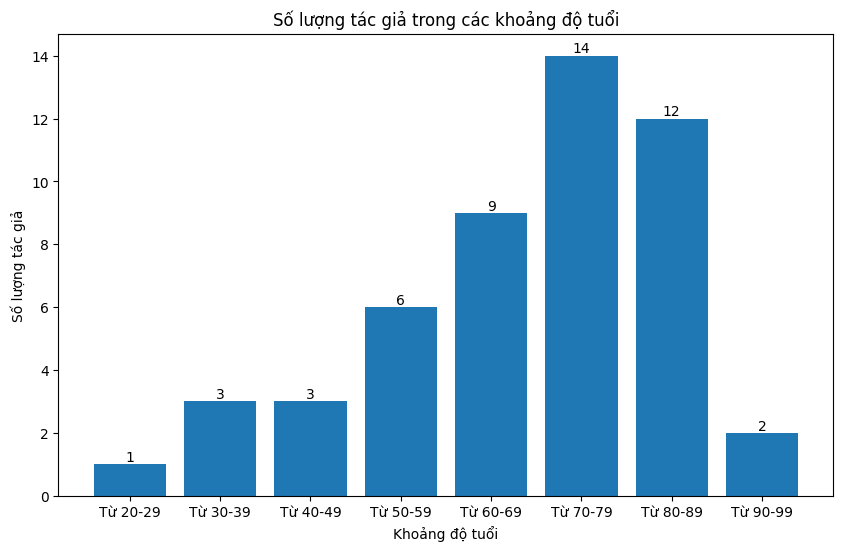

In [44]:
import matplotlib.pyplot as plt
age_20s = 0
age_30s = 0
age_40s = 0
age_50s = 0
age_60s = 0
age_70s = 0
age_80s = 0
age_90s = 0
# Duyệt qua từng tác giả và kiểm tra độ tuổi của họ nằm trong khoảng nào
for age in authors_age.values():
    if age >= 20 and age < 30:
        age_20s += 1
    elif age >= 30 and age < 40:
        age_30s += 1
    elif age >= 40 and age < 50:
        age_40s += 1
    elif age >= 50 and age < 60:
        age_50s += 1
    elif age >= 60 and age < 70:
        age_60s += 1
    elif age >= 70 and age < 80:
        age_70s += 1
    elif age >= 80 and age < 90:
        age_80s += 1
    elif age >= 90 and age < 100:
        age_90s += 1
# Tạo list các khoảng độ tuổi và list số lượng tác giả tương ứng
age_ranges = ['Từ 20-29', 'Từ 30-39', 'Từ 40-49', 'Từ 50-59',
              'Từ 60-69', 'Từ 70-79', 'Từ 80-89', 'Từ 90-99']
author_counts = [age_20s, age_30s, age_40s,
                 age_50s, age_60s, age_70s, age_80s, age_90s]
fig, ax = plt.subplots(figsize=(10, 6))
# Vẽ đồ thị số lượng tác giả trong các khoảng độ tuổi
ax.bar(age_ranges, author_counts)
ax.set_xlabel('Khoảng độ tuổi')
ax.set_ylabel('Số lượng tác giả')
ax.set_title('Số lượng tác giả trong các khoảng độ tuổi')
# Hiển thị số lượng tác giả của mỗi khoảng độ tuổi trên thanh bar chart
for i, v in enumerate(author_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Hiển thị đồ thị
plt.show()


## 3.2.3. Trích xuất đặc trưng - Feature Extraction

##### Lưu 1 file quote mới có đầy đủ trường Tuổi của các các giả để thực hiện tiếp theo của đề bài

In [45]:
df_data.to_csv('Quote_1.csv')

##### Em nhận thấy trong file Quote_11.csv của tập dữ liệu thu thập được có những trường "Tên tác giả", "Đường link của tác giả", "Ngày tháng năm sinh" và "Tuổi" có các giá trị trùng lặp với nhau của các tác giả. Riêng trường "Câu nói nổi tiếng của tác giả" thì không trùng lặp.
##### Vì vậy nên em thực hiện gộp các trường trùng lặp lại với nhau thành 1, trường không trùng lặp thì em gộp chung vào 1 ô dữ liệu. Làm vậy để trích lọc được những dữ liệu cần thiết và bảng dữ liệu trở nên trực quan hơn

In [47]:
import pandas as pd
df = pd.read_csv('Quote_1.csv')
# Nhóm các dòng theo tên tác giả và sử dụng hàm agg để lấy giá trị đầu tiên của các cột trùng lặp
df_merged = df.groupby('Tên tác giả', as_index=False).agg({'Đường link của tác giả': 'first',
                                                           'Ngày tháng năm sinh': 'first', 
                                                           'Câu nói nổi tiếng của tác giả': '\n'.join,
                                                           'Tuổi': 'first'})
df_merged

,Tên tác giả,Đường link của tác giả,Ngày tháng năm sinh,Câu nói nổi tiếng của tác giả,Tuổi
0,Albert Einstein,https://quotes.toscrape.com/author/Albert-Eins...,"March 14, 1879",“The world as we have created it is a process ...,76
1,Alexandre Dumas fils,https://quotes.toscrape.com/author/Alexandre-D...,"July 27, 1824",“The difference between genius and stupidity i...,71
2,Alfred Tennyson,https://quotes.toscrape.com/author/Alfred-Tenn...,"August 06, 1809",“If I had a flower for every time I thought of...,83
3,Allen Saunders,https://quotes.toscrape.com/author/Allen-Saunders,"April 24, 1899",“Life is what happens to us while we are makin...,86
4,André Gide,https://quotes.toscrape.com/author/Andre-Gide,"November 22, 1869",“It is better to be hated for what you are tha...,82
5,Ayn Rand,https://quotes.toscrape.com/author/Ayn-Rand,"February 02, 1905",“The question isn't who is going to let me; it...,77
6,Bob Marley,https://quotes.toscrape.com/author/Bob-Marley,"February 06, 1945","“You may not be her first, her last, or her on...",36
7,C.S. Lewis,https://quotes.toscrape.com/author/C-S-Lewis,"November 29, 1898",“You can never get a cup of tea large enough o...,64
8,Charles Bukowski,https://quotes.toscrape.com/author/Charles-Buk...,"August 16, 1920","“That's the problem with drinking, I thought, ...",74
9,Charles M. Schulz,https://quotes.toscrape.com/author/Charles-M-S...,"November 26, 1922",“All you need is love. But a little chocolate ...,78


In [48]:
df_merged.to_csv('new.csv')

## 3.2.4. Suy luận

### - Hãy dự đoán tên của người nổi tiếng theo câu nói dựa trên các đặc trưng bạn trích xuất ở trên và đánh giá trên bộ dữ liệu đã cho với tỉ lệ Train/Test và các độ đo phù hợp?

+ Để có thể dự đoán tên của người nổi tiếng theo câu nói nổi tiếng, chúng ta cần phân tích câu nói nổi tiếng để hiểu các vấn đề và chủ đề mà nó đề cập. Xem xét các từ khóa, ý nghĩa và thông điệp chính trong câu nói được sử dụng trong các câu nói của mỗi người. Sau đó, dựa trên thông tin và phân tích, suy luận và đưa ra dự đoán về tác giả có thể đã nói câu nói nổi tiếng đó. Xem xét các tác giả có những quan điểm, ý tưởng hay tư tưởng tương tự. 
+ Ví dụ: Albert Einstein – ngài có phong cách nói chủ yếu hướng đến về một cuộc sống tốt hơn, sự tạo hình thế giới, quan niệm sống, giá trị cá nhân, sự hiểu biết, sự sáng tạo, tưởng tượng, sự nhận thức, sự cân bằng, sự học hỏi, thử thách, cái đẹp của vật lí trong cuộc sống, khuyên nhủ mọi người hãy không người cố gắng.

### - Hãy đề xuất cách tính độ tương đồng phong cách nói giữa các tác giả và tìm ra các tác giả có phong cách nói tương đồng nhau nhất?

Để tính độ tương đồng phong cách nói giữa các tác giả, ta có thể sử dụng phương pháp Vector Space Model (mô hình không gian vector) và độ đo Cosine Similarity. Dưới đây là một phân tích cụ thể về cách áp dụng phương pháp này:
- Tiền xử lý dữ liệu:
    + Thu thập và tạo bộ dữ liệu chứa các câu nói của các tác giả 
    + Loại bỏ các ký tự đặc biệt, số và dấu câu không cần thiết từ các câu nói.
    + Chuyển đổi các câu nói về dạng viết thường (lowercase) để đảm bảo tính nhất quán trong việc so sánh.
- Trích xuất đặc trưng:
    + Tạo một từ điển (vocabulary) từ tất cả các từ xuất hiện trong các câu nói của tác giả.
    + Đếm tần số xuất hiện của từng từ trong từ điển trong mỗi câu nói của từng tác giả.
    + Tạo vector đặc trưng cho mỗi tác giả bằng cách sắp xếp các tần số từng từ vào một vector.
- Tính toán độ tương đồng:
    + Sử dụng độ đo Cosine Similarity để tính toán độ tương đồng giữa các vector đặc trưng của tác giả.
    + Độ đo Cosine Similarity tính toán cosin của góc giữa hai vector trong không gian vector. 
    + Kết quả nằm trong khoảng từ -1 đến 1, với 1 là độ tương đồng tuyệt đối và -1 là độ tương đồng hoàn toàn đối ngược.
- Tìm các tác giả có phong cách nói tương đồng nhau nhất:
    + Dựa vào ma trận độ tương đồng, xác định ngưỡng (threshold) để quyết định tác giả có phong cách nói tương đồng nhau.
    + Có thể sử dụng ngưỡng dựa trên một giá trị cố định hoặc dựa trên phân phối tự nhiên của các giá trị độ tương đồng.
    + Tìm các cặp tác giả có độ tương đồng vượt qua ngưỡng và hiển thị danh sách các tác giả có phong cách nói tương đồng nhau nhất.
- Tìm các tác giả có phong cách nói tương đồng nhau nhất:
    + Dựa vào ma trận độ tương đồng (similarity matrix), xác định ngưỡng (threshold) để quyết định tác giả có phong cách nói tương đồng nhau.
    + Có thể sử dụng ngưỡng dựa trên một giá trị cố định hoặc dựa trên phân phối tự nhiên của các giá trị độ tương đồng. Ví dụ, bạn có thể đặt ngưỡng là 0.8, nghĩa là nếu độ tương đồng giữa hai tác giả vượt qua 0.8, thì được coi là phong cách nói tương đồng.
    + Duyệt qua ma trận độ tương đồng và tìm các cặp tác giả có độ tương đồng vượt qua ngưỡng đã định.
Hiển thị danh sách các tác giả có phong cách nói tương đồng nhau nhất.
